In [39]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as offline
import plotly
plotly.__version__
from ast import literal_eval
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv( 'Top_10000_Movies.csv', engine='python' )
df.head()


,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


In [40]:
df.isnull().sum()

Unnamed: 0              0
id                     12
original_language      12
original_title         13
popularity             14
release_date           52
vote_average           14
vote_count             14
genre                  14
overview              114
revenue                16
runtime                25
tagline              2935
dtype: int64

In [41]:
df.drop(columns=['id', 'overview','tagline','Unnamed: 0'], inplace=True)

In [42]:
df.duplicated().sum()

11

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df['genre'].value_counts().nlargest(10)


['Drama']                         533
['Comedy']                        440
['Horror']                        239
['Drama', 'Romance']              209
['Horror', 'Thriller']            206
['Documentary']                   201
['Comedy', 'Romance']             193
['Comedy', 'Drama']               159
[]                                133
['Comedy', 'Drama', 'Romance']    111
Name: genre, dtype: int64

In [45]:
df.dropna(subset=['vote_average'], inplace=True)

In [46]:
df.dropna(subset=['release_date'], inplace=True)

In [47]:
df['genre'].value_counts().nlargest(11)

['Drama']                         532
['Comedy']                        439
['Horror']                        239
['Drama', 'Romance']              209
['Horror', 'Thriller']            205
['Documentary']                   199
['Comedy', 'Romance']             193
['Comedy', 'Drama']               159
[]                                120
['Comedy', 'Drama', 'Romance']    111
['Action', 'Thriller']            108
Name: genre, dtype: int64

In [48]:
df.describe()

,popularity,vote_average,vote_count,revenue,runtime
count,9962.000000,9962.000000,9962.000000,9.960000e+03,9951.000000
mean,34.533754,6.318320,1320.097169,5.759426e+07,99.104412
std,100.871458,1.392473,2505.347545,1.483295e+08,28.183502
min,6.269000,0.000000,0.000000,0.000000e+00,0.000000
25%,11.908000,5.900000,121.000000,0.000000e+00,89.000000
50%,17.484000,6.500000,428.500000,7.092505e+05,99.000000
75%,29.619250,7.100000,1303.750000,4.798574e+07,113.000000
max,5401.308000,9.500000,30184.000000,2.847246e+09,400.000000


In [49]:
values = ['[]']
df = df[df.genre.isin(values) == False]

In [50]:
df['genre'].value_counts().nlargest(10)



['Drama']                         532
['Comedy']                        439
['Horror']                        239
['Drama', 'Romance']              209
['Horror', 'Thriller']            205
['Documentary']                   199
['Comedy', 'Romance']             193
['Comedy', 'Drama']               159
['Comedy', 'Drama', 'Romance']    111
['Drama', 'Thriller']             108
Name: genre, dtype: int64

In [51]:
df['release_date'] = pd.to_datetime(df['release_date'],  format="%Y-%m-%d")
df['release_date'] = df['release_date'].dt.year

df

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,revenue,runtime
0,en,Venom: Let There Be Carnage,5401.308,2021,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",424000000.0,97.0
1,en,Eternals,3365.535,2021,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",165000000.0,157.0
2,en,Dune,2911.423,2021,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']",331116356.0,155.0
3,en,Army of Thieves,2552.437,2021,6.9,555.0,"['Action', 'Crime', 'Thriller']",0.0,127.0
4,en,Free Guy,1850.470,2021,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",331096766.0,115.0
...,...,...,...,...,...,...,...,...,...
10009,en,A Grand Day Out,9.266,1990,7.5,594.0,"['Adventure', 'Animation', 'Comedy', 'Science ...",0.0,23.0
10010,en,El cantante,10.417,2006,7.0,80.0,"['History', 'Drama', 'Music']",0.0,116.0
10011,en,How I Live Now,9.520,2013,6.6,705.0,"['Drama', 'Action', 'Thriller', 'War']",0.0,101.0
10012,en,Once,9.267,2007,7.4,990.0,"['Drama', 'Music', 'Romance']",20710513.0,85.0


Text(0.5, 1.0, 'correlation matrix')

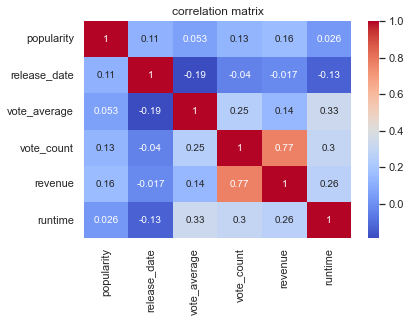

In [52]:
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

plt.title('correlation matrix')

Text(0, 0.5, 'Number of movies')

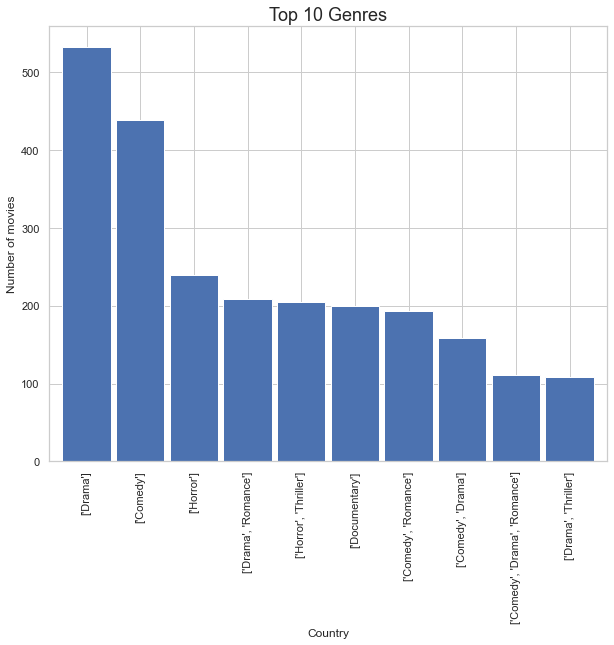

In [53]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.title('Top 10 Genres', fontsize=18)
df2=df['genre'].value_counts()
df2.iloc[0:10].plot(kind='bar',width = 0.9)
plt.xlabel("Country")
plt.ylabel("Number of movies")

Text(0.5, 0, 'Number of movies')

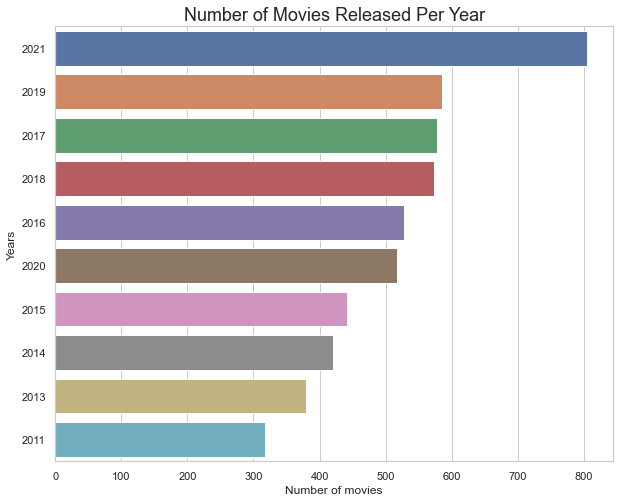

In [56]:

plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
plt.title('Number of Movies Released Per Year', fontsize=18)
ax = sns.countplot(y="release_date", data=df, order=df['release_date'].value_counts().index[:10])
plt.ylabel("Years")
plt.xlabel("Number of movies")

In [57]:
df.dropna(subset=['vote_average'], inplace=True)

In [74]:
df.dropna(subset=['vote_count'], inplace=True)

<AxesSubplot:xlabel='vote_count', ylabel='genre'>

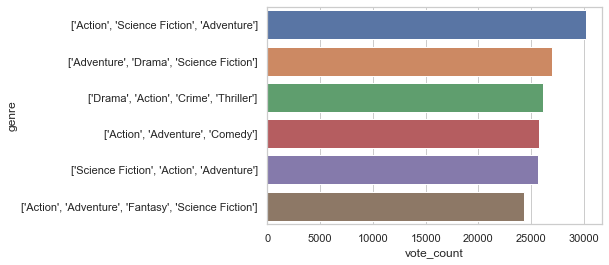

In [75]:
genre_top6 = df.sort_values("vote_count", ascending = False)[['genre', 'vote_count']][0:6]
sns.barplot(data=genre_top6, x = 'vote_count', y = 'genre')

In [76]:
df.dropna(subset=['original_title'], inplace=True)


In [78]:
df.dropna(subset=['revenue','runtime'], inplace=True)

In [79]:
df.isnull().sum()

original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
genre                0
revenue              0
runtime              0
dtype: int64

In [80]:
# Top revenue
top_Revenue = df[['original_title', 'revenue']].sort_values('revenue', ascending = False).head(10)

#Top rating
top_rating = df[['original_title', 'vote_count']].sort_values('vote_count', ascending = False).head(10)

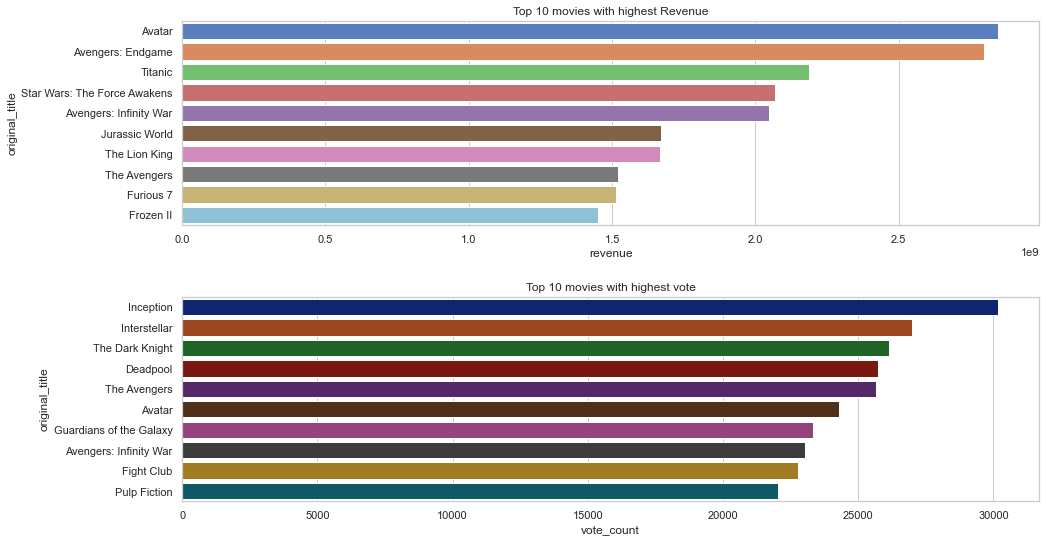

In [81]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (15,8))

ax1.set_title('Top 10 movies with highest Revenue')
sns.barplot(x = 'revenue', y = 'original_title', data = top_Revenue , ax = ax1, palette = 'muted');

ax2.set_title('Top 10 movies with highest vote')
sns.barplot(x = 'vote_count', y = 'original_title', data = top_rating , ax = ax2, palette = 'dark');

plt.tight_layout(pad= 2)

In [82]:
df.loc[df["original_title"] =="Avatar"]

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,revenue,runtime
66,en,Avatar,374.059,2009,7.5,24280.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2.847246e+09,162.0


In [83]:
df.loc[df["original_title"] =="Avengers: Endgame"]

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,revenue,runtime
167,en,Avengers: Endgame,193.86,2019,8.3,19434.0,"['Adventure', 'Science Fiction', 'Action']",2.797801e+09,181.0


In [65]:

df.loc[df["original_title"] =="Ebola Zombies"]

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,revenue,runtime
5024,zh,Ebola Zombies,14.316,2015,9.5,2.0,"['Horror', 'Science Fiction']",0.0,90.0


Text(0.5, 1.0, 'correlation matrix')

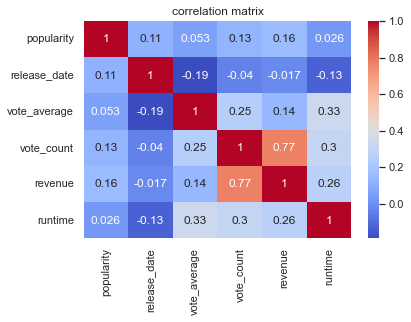

In [84]:
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

plt.title('correlation matrix')

In [85]:
df['revenue'].nlargest()

66      2.847246e+09
167     2.797801e+09
489     2.187464e+09
1013    2.068224e+09
97      2.046240e+09
Name: revenue, dtype: float64

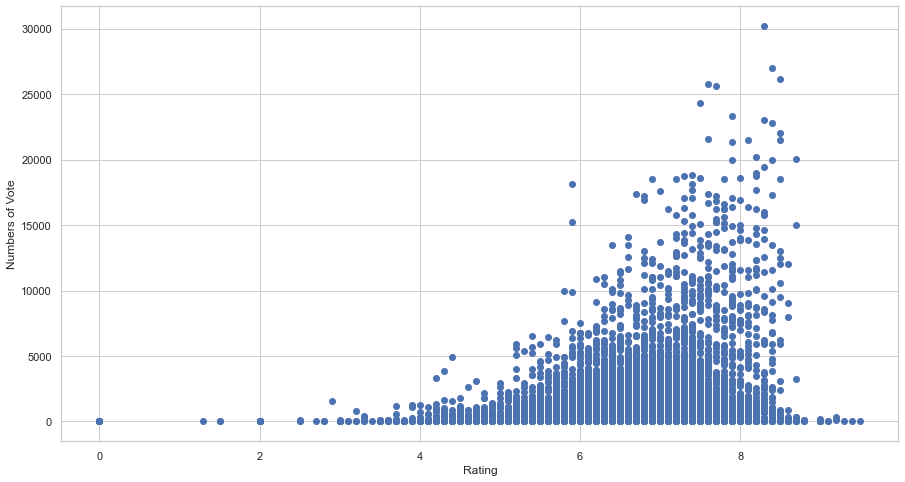

In [87]:
fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(df['vote_average'], df['vote_count'])
 
# x-axis label
ax.set_xlabel('Rating')
 
# y-axis label
ax.set_ylabel('Numbers of Vote')
plt.show()

In [88]:
def remove_outlier(df, vote_average):
    q1 = df['vote_average'].quantile(0.25)
    q3 = df['vote_average'].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df['vote_average'] > fence_low) & (df['vote_average'] < fence_high)]
    return df_out

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe578e87f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe578ea9550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe578e87ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe578ea9af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe578ea9dc0>],
 'means': []}

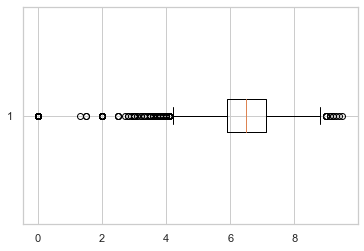

In [72]:
plt.boxplot(x=df['vote_average'], vert=False)